Visualize MNIST with PCA
---

Solution - Load data
---

> **Exercise**: Load the ten thousand images and their labels from `c4_mnist-10k.npz`.

In [1]:
import numpy as np
import os

# Load data
with np.load("c4_mnist-10k.npz") as npz_file:
    X = npz_file["data"]
    y = npz_file["labels"]

print("X:", X.shape, X.dtype)
print("y:", y.shape, y.dtype)

X: (10000, 784) uint8
y: (10000,) int32


In [3]:
X.shape

(10000, 784)

Solution - Visualize digits on a 2d plot
---

> **Exercise**: Compute the first two principal components using all the images and then plot a subset of the database using them, e.g., 500 images.

In [2]:
from sklearn.decomposition import PCA

# Compute first two principal components
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

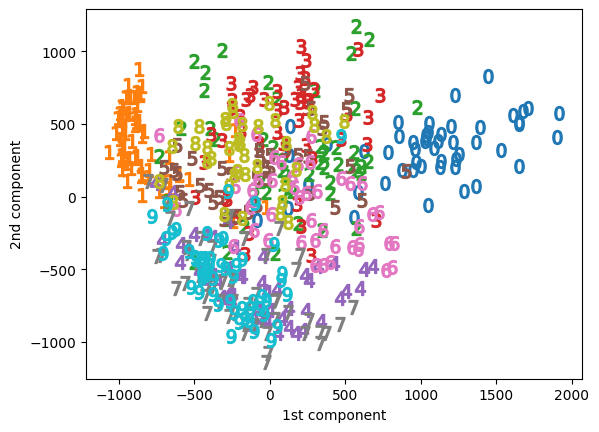

In [4]:
%matplotlib inline
#%config InlineBackend.figure_format ='retina' # For retina screens (mac)
import matplotlib.pyplot as plt

# Compute component scores of 500 images
digits_components = pca.transform(X[:500])
digits_label = y[:500]

# Group images by digit
for label in range(10):  # 0,1,2,3..9
    # Images of this digit
    idx = digits_label == label

    # Plot images
    plt.scatter(
        digits_components[idx, 0],
        digits_components[idx, 1],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=100,  # Size of each marker
    )

# Add legend and labels
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()